# Linear Regration Salary Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Salary_Data.csv")

### __Scatter Plot__

In [3]:
x = df['YearsExperience']
y = df['Salary']

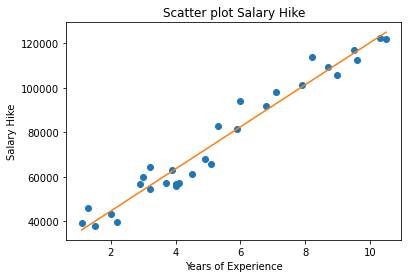

In [4]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

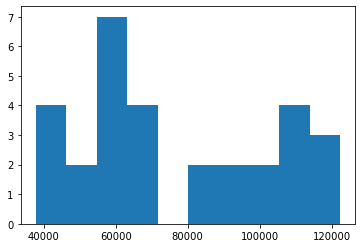

In [47]:
plt.hist(y)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

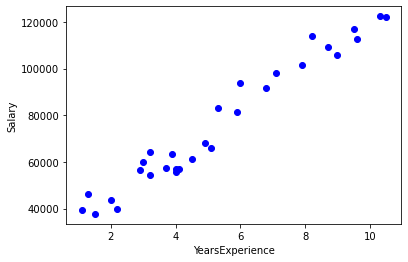

In [49]:
#Scatterplot 
plt.plot(x,y, 'bo')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5058af730>,
 'caps': [<matplotlib.lines.Line2D at 0x1b505d69130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b505cd59a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b505d696d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b505d699d0>],
 'means': []}

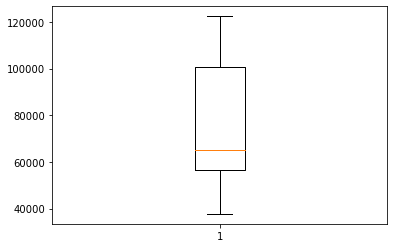

In [50]:
#discribe 
plt.boxplot(y)

As displayed in the scatter plot,but there is positive correlation between Salary Hike and Years of experience

### __Correlation Analysis__

In [5]:
corr = np.corrcoef(x, y)

In [45]:
corr

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

## Regression Model

### No transformation

In [6]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    2.56e-24
Time:                        16:46:29   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#RMSE values root mean squear errore 
pred = model.predict(y)
model_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model_RMSE 

1068809568.0712746

###  Log Transformation of X

In [8]:
x_log = np.log(df['YearsExperience'])

In [9]:
model1 = sm.OLS(y, x_log).fit()
predictions = model1.predict(x_log)

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    8.06e-26
Time:                        16:46:29   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#RMSE values root mean squear errore 
pred = model1.predict(y)
model1_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model1_RMSE 

3958312249.5877824

### Log Transformation of Y

In [11]:
y_log = np.log(df['Salary'])

In [12]:
model2 = sm.OLS(y_log, x).fit()
predictions = model2.predict(x)

In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    6.09e-12
Time:                        16:46:29   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#RMSE values root mean squear errore 
pred = model2.predict(y)
model2_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model2_RMSE 

54476.95725074496

### Log Transformation of X & Y

In [14]:
model3 = sm.OLS(y_log, x_log).fit()
predictions = model3.predict(x_log)

In [15]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    8.60e-15
Time:                        16:46:29   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#RMSE values root mean squear errore 
pred = model3.predict(y)
model3_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model3_RMSE 

439180.07034310827

### Sq Root Transformation of X

In [16]:
x_sqrt = np.sqrt(df['YearsExperience'])

In [17]:
model4 = sm.OLS(y, x_sqrt).fit()
predictions = model4.predict(x_sqrt)

In [18]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    3.62e-30
Time:                        16:46:29   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#RMSE values root mean squear errore 
pred = model4.predict(y)
model4_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model4_RMSE 

2806029804.7048807

###  Square Root Transformation of Y

In [19]:
y_sqrt = np.sqrt(df['Salary'])

In [20]:
model5 = sm.OLS(y_sqrt, x).fit()
predictions = model5.predict(x)

In [21]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    2.12e-16
Time:                        16:46:29   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#RMSE values root mean squear errore 
pred = model5.predict(y)
model5_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model5_RMSE 

3444512.046509491

### Square Root Transformation of X & Y

In [22]:
model6 = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model6.predict(x_sqrt)

In [23]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    2.81e-29
Time:                        16:46:30   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#RMSE values root mean squear errore 
pred = model6.predict(y)
model6_RMSE = np.sqrt(np.mean((np.array(y)-np.array(pred))**2))
model6_RMSE 

9504758.679583127

## Output Interpretation 

In [39]:
datam ={"Model":pd.Series(["No transformation","Log Transformation of X","Log Transformation of Y","Log Transformation of X & Y",
                          "Sq Root Transformation of X","Square Root Transformation of Y","Square Root Transformation of X & Y"]),
       "RMSE_Values":pd.Series([model_RMSE,model1_RMSE,model2_RMSE,model3_RMSE,model4_RMSE,model5_RMSE,model6_RMSE]),
       "RSquear": pd.Series([model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared]),
       "p value": pd.Series([model.pvalues,model1.pvalues,model2.pvalues,model3.pvalues,model4.pvalues,model5.pvalues,model6.pvalues])}
table = pd.DataFrame(datam)
table

,Model,RMSE_Values,RSquear,p value
0,No transformation,1.068810e+09,0.973079,YearsExperience 2.563404e-24 dtype: float64
1,Log Transformation of X,3.958312e+09,0.978790,YearsExperience 8.055486e-26 dtype: float64
2,Log Transformation of Y,5.447696e+04,0.808995,YearsExperience 6.094288e-12 dtype: float64
3,Log Transformation of X & Y,4.391801e+05,0.878209,YearsExperience 8.604094e-15 dtype: float64
4,Sq Root Transformation of X,2.806030e+09,0.989362,YearsExperience 3.621406e-30 dtype: float64
5,Square Root Transformation of Y,3.444512e+06,0.905561,YearsExperience 2.122030e-16 dtype: float64
6,Square Root Transformation of X & Y,9.504759e+06,0.987748,YearsExperience 2.809853e-29 dtype: float64


# Square Root Transformation of X is best model

In [41]:
resid = model4.resid_pearson

In [42]:
resid

array([ 0.33653209,  0.7718501 , -0.57770227, -0.67215675, -1.38565026,
       -0.30925302, -0.01432946, -0.92235508,  0.2597193 , -1.15199451,
       -0.65034982, -1.63140611, -1.49393086, -1.58147173, -1.50192849,
       -1.07448035, -1.48410152,  0.3520091 , -0.37354654,  1.0288325 ,
        0.11784609,  0.65627648,  0.41332176,  1.6746233 ,  0.80296015,
        0.14056986,  1.14845294,  0.56958946,  1.26634529,  1.07744502])

In [43]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

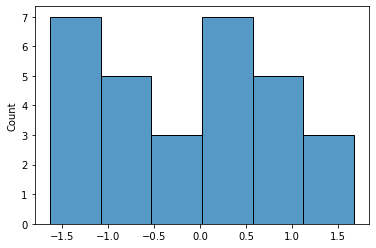

In [44]:
sns.histplot(resid)